# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

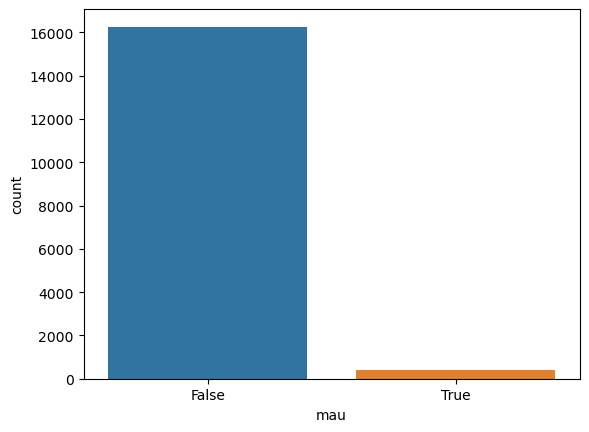

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('G:\Downloads\demo01 (2).csv')

# Avaliar as variáveis e tipos de dados
print(df.info())

# Quantidade de dados faltantes
print(df.isnull().sum())

# Distribuição da variável resposta (mau) = 1
print(df['mau'].value_counts(normalize=True))

# Visualizar a distribuição da variável resposta
sns.countplot(x='mau', data=df)
plt.show()

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável.
    Dica:
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis,
        3. conte o número de categorias dessa variável
        4. acumule essa informação de 3. na lista que você criou em 1.
        5. No final, essa lista pode ser atribuída à nossa variável.

In [17]:
# Criar df com nomes das variáveos e tipos de dados
metadata = pd.DataFrame({'variavel': df.columns,'tipo_dado': df.dtypes})

# Adicionar coluna 'qtd_categorias'
qtd_categorias = []
for col in df.columns:
    qtd_categorias.append(df[col].nunique())

metadata['qtd_categorias'] = qtd_categorias

print(metadata)

                                    variavel tipo_dado  qtd_categorias
sexo                                    sexo    object               2
posse_de_veiculo            posse_de_veiculo    object               2
posse_de_imovel              posse_de_imovel    object               2
qtd_filhos                        qtd_filhos     int64               8
tipo_renda                        tipo_renda    object               5
educacao                            educacao    object               5
estado_civil                    estado_civil    object               5
tipo_residencia              tipo_residencia    object               6
idade                                  idade   float64            5298
tempo_emprego                  tempo_emprego   float64            3005
possui_celular                possui_celular     int64               1
possui_fone_comercial  possui_fone_comercial     int64               2
possui_fone                      possui_fone     int64               2
possui

#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [37]:
# Identificar variáveis qualitativas
qualitativas = metadata[metadata['tipo_dado'] == 'object']['variavel'].tolist()

# Remover variáveis que já são {0, 1} ou {True, False}
for var in ['mau', 'possui_celular', 'possui_fone_comercial']:
    if var in qualitativas:
        qualitativas.remove(var)

# Criar variáveis dummy para as variáveis qualitativas restantes
df_dummies = pd.get_dummies(df, columns=qualitativas, drop_first=True)

# Eliminar variáveis do tipo str do dataframe original
df_prepared = df_dummies.select_dtypes(exclude=['object'])

# Visualizar o dataframe preparado
print(df_prepared.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              16650 non-null  int64  
 1   idade                                   16650 non-null  float64
 2   tempo_emprego                           16650 non-null  float64
 3   possui_celular                          16650 non-null  int64  
 4   possui_fone_comercial                   16650 non-null  int64  
 5   possui_fone                             16650 non-null  int64  
 6   possui_email                            16650 non-null  int64  
 7   qt_pessoas_residencia                   16650 non-null  float64
 8   mau                                     16650 non-null  bool   
 9   sexo_M                                  16650 non-null  bool   
 10  posse_de_veiculo_Y                      16650 non-null  bo

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

Tabela cruzada - possui_email e mau:
mau                  0         1
possui_email                    
0             0.976269  0.023731
1             0.979730  0.020270
Tabela cruzada - posse_de_veiculo e mau:
mau                      0         1
posse_de_veiculo                    
N                 0.975732  0.024268
Y                 0.977905  0.022095


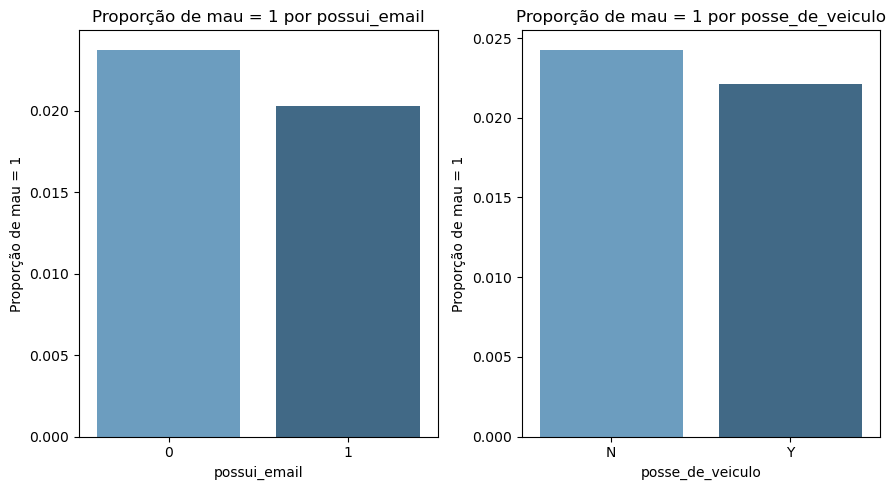

In [55]:
# Transformando a coluna 'mau' para 1 (True) e 0 (False)
df['mau'] = df['mau'].astype(int)

# Tabela cruzada entre possui_email e mau
crosstab_email = pd.crosstab(df['possui_email'], df['mau'], normalize='index')
print("Tabela cruzada - possui_email e mau:")
print(crosstab_email)

# Tabela cruzada entre posse_de_veiculo e mau
crosstab_veiculo = pd.crosstab(df['posse_de_veiculo'], df['mau'], normalize='index')
print("Tabela cruzada - posse_de_veiculo e mau:")
print(crosstab_veiculo)

# Análise visual
fig, axes = plt.subplots(1, 2, figsize=(9, 5))

# Verificar se a coluna '1' está presente nas tabelas cruzadas
if 1 in crosstab_email.columns:
    sns.barplot(ax=axes[0], x=crosstab_email.index, y=crosstab_email[1], palette="Blues_d")
    axes[0].set_title('Proporção de mau = 1 por possui_email')
    axes[0].set_xlabel('possui_email')
    axes[0].set_ylabel('Proporção de mau = 1')
else:
    axes[0].text(0.4, 0.4, 'Coluna 1 não encontrada em possui_email', horizontalalignment='center', verticalalignment='center')
    axes[0].set_title('Proporção de mau = 1 por possui_email')
    axes[0].set_xlabel('possui_email')
    axes[0].set_ylabel('Proporção de mau = 1')

if 1 in crosstab_veiculo.columns:
    sns.barplot(ax=axes[1], x=crosstab_veiculo.index, y=crosstab_veiculo[1], palette="Blues_d")
    axes[1].set_title('Proporção de mau = 1 por posse_de_veiculo')
    axes[1].set_xlabel('posse_de_veiculo')
    axes[1].set_ylabel('Proporção de mau = 1')
else:
    axes[1].text(0.4, 0.4, 'Coluna 1 não encontrada em posse_de_veiculo', horizontalalignment='center', verticalalignment='center')
    axes[1].set_title('Proporção de mau = 1 por posse_de_veiculo')
    axes[1].set_xlabel('posse_de_veiculo')
    axes[1].set_ylabel('Proporção de mau = 1')

plt.tight_layout()
plt.show()

#### *Ao cruzar as tabelas, podemos verificar que há uma proporção praticamente equivalente entre ambas as variáveis em relação aos maus pagadores, porém, a variável 'possui_email' tem uma disparidade maior em relação à variável 'posse_de_veículo', então ela pode ser mais assertiva se analisarmos somente essas duas variáveis.*

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [57]:
df_prepared.to_csv('G:\Downloads\df_prepared.csv', index=False)